# Zadanie 2

W zadaniu tym skupimy się na symulacji zmiennych losowych z rozkładu normalnego. Użyjemy do tego kilku poznanych już wcześniej metod oraz zaimplementujemy metodę ziggurat, a takżę metodę tuzinów.

Zaczniemy od zaimportowania niezbędnych bibliotek, które pomogą nam podczas symulacji, a także w późniejszym zwizualizowaniu otrzymanych próbek.

In [51]:
import math
import time
import typing

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.special import erfinv
from scipy.stats import norm

## Wcześniej poznane metody generowania rozkładu normalnego

### Metoda odwrotnej dystrybuanty

In [52]:
def odwr_dyst(size: int = 10000, mi: float = 0, sigma: float = 1):
    """
    Funckja generująca zmienne z rozkładu normalnego metodą odwrotnej dystrybuanty

    Parametry:
    size (int): liczba zmiennych losowych do wygenerowania
    mi (float): parametr wartości oczekiwanej rozkładu normalnego
    sigma (float): parametr odchylenia standardowego rozkładu normalnego

    Zwraca:
    (np.ndarray): zmienne lososwe z rozkładu normalnego N(0,1)

    -> odwr_dyst(size = 1000, mi = 0, sigma = 1)
    """
    sample = np.random.uniform(0, 1, size)
    return mi + sigma * math.sqrt(2) * erfinv(2 * sample - 1)

Tak zaimplementowaną metodę porównamy z dystrybyantą i gęstością teoretyczną w celu analizy poprawności wyników.

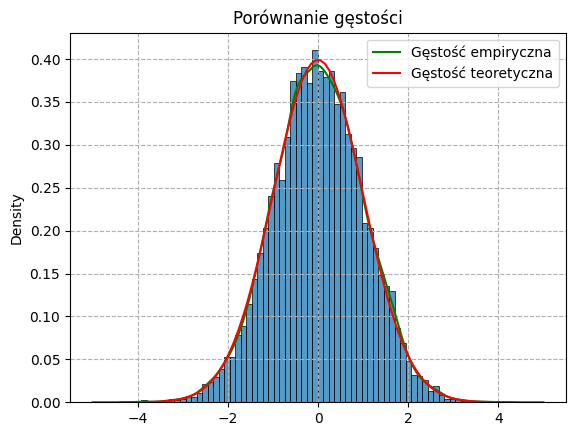

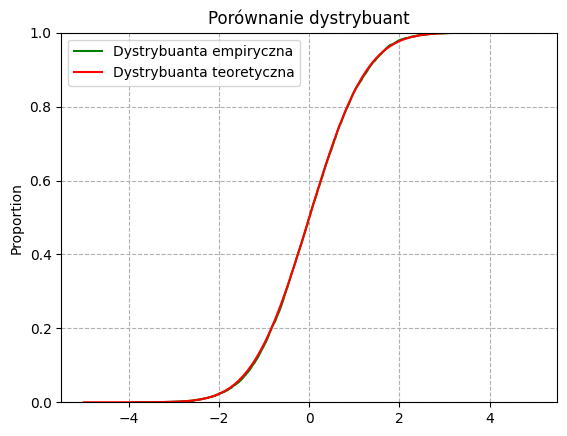

In [53]:
wynik = odwr_dyst()
xs = np.linspace(-5, 5, 100)

# Porównanie gęstości

sns.histplot(
    wynik,
    stat="density",
)
sns.kdeplot(wynik, color="g", label="Gęstość empiryczna")
plt.plot(xs, norm.pdf(xs, 0, 1), color="r", label="Gęstość teoretyczna")

plt.title("Porównanie gęstości")
plt.grid(linestyle="--")
plt.legend(loc="best")
plt.show()

# Porównanie dystrybuant

sns.ecdfplot(wynik, color="g", label="Dystrybuanta empiryczna")
plt.plot(xs, norm.cdf(xs, 0, 1), color="r", label="Dystrybuanta teoretyczna")

plt.title("Porównanie dystrybuant")
plt.grid(linestyle="--")
plt.legend(loc="best")
plt.show()

### Metoda Boxa-Mullera

In [54]:
def box_muller(size: int = 10000) -> np.ndarray:
    """
    Funckja generująca zmienne z rozkładu normalnego metodą Boxa-Mullera

    Parametry:
    size (int): liczba zmiennych losowych do wygenerowania

    Zwraca:
    Z (np.ndarray): zmienne lososwe z rozkładu normalnego N(0,1)

    -> box_muller(1000)
    """
    u1 = np.random.uniform(0, 1, int(size / 2))
    u2 = np.random.uniform(0, 1, int(size / 2))
    X = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    Y = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    Z = np.concatenate((X, Y))
    return Z

Tak zaimplementowaną metodę porównamy z dystrybyantą i gęstością teoretyczną w celu analizy poprawności wyników.

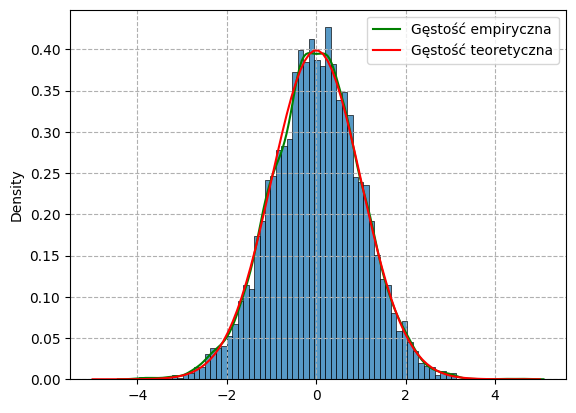

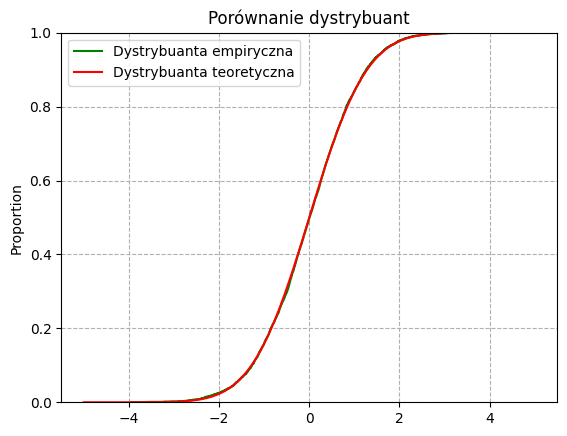

In [55]:
wynik = box_muller()
xs = np.linspace(-5, 5, 100)

# Porównanie gęstości

sns.histplot(
    wynik,
    stat="density",
)
sns.kdeplot(wynik, color="g", label="Gęstość empiryczna")
plt.plot(xs, norm.pdf(xs, 0, 1), color="r", label="Gęstość teoretyczna")
plt.grid(linestyle="--")
plt.legend(loc="best")
plt.show()

# Porównanie dystrybuant

sns.ecdfplot(wynik, color="g", label="Dystrybuanta empiryczna")
plt.plot(xs, norm.cdf(xs, 0, 1), color="r", label="Dystrybuanta teoretyczna")

plt.title("Porównanie dystrybuant")
plt.grid(linestyle="--")
plt.legend(loc="best")
plt.show()

### Metoda Marsaglii

In [67]:
def marsagla(size: int = 10000):
    """
    Funckja generująca zmienne z rozkładu normalnego metodą Marsagli

    Parametry:
    size (int): liczba zmiennych losowych do wygenerowania

    Zwraca:
    Z (np.ndarray): zmienne lososwe z rozkładu normalnego N(0,1)

    -> marsagla(size = 1000)
    """
    X = np.zeros(int(size / 2))
    Y = np.zeros(int(size / 2))

    for i in range(int(size / 2)):
        while True:
            v1 = np.random.uniform(-1, 1)
            v2 = np.random.uniform(-1, 1)
            R2 = v1**2 + v2**2
            if R2 <= 1:
                X[i] = np.sqrt((-2 * np.log(R2)) / (R2)) * v1
                Y[i] = np.sqrt((-2 * np.log(R2)) / (R2)) * v2
                break
    Z = np.concatenate((X, Y))
    return Z

Tak zaimplementowaną metodę porównamy z dystrybyantą i gęstością teoretyczną w celu analizy poprawności wyników.

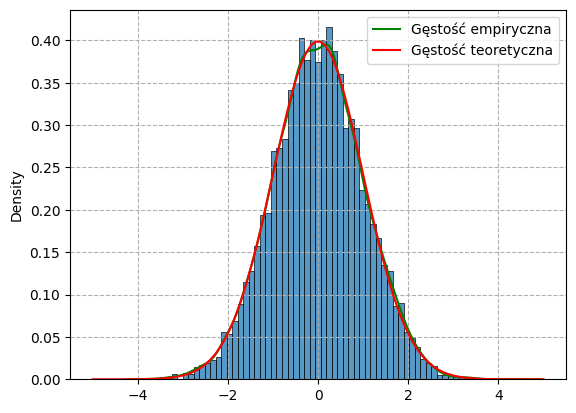

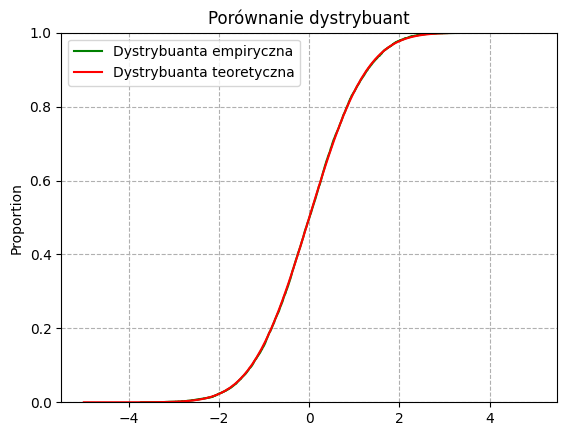

In [68]:
wynik = marsagla()
xs = np.linspace(-5, 5, 100)

# Porównanie gęstości

sns.histplot(
    wynik,
    stat="density",
)
sns.kdeplot(wynik, color="g", label="Gęstość empiryczna")
plt.plot(xs, norm.pdf(xs, 0, 1), color="r", label="Gęstość teoretyczna")
plt.grid(linestyle="--")
plt.legend(loc="best")
plt.show()

# Porównanie dystrybuant

sns.ecdfplot(wynik, color="g", label="Dystrybuanta empiryczna")
plt.plot(xs, norm.cdf(xs, 0, 1), color="r", label="Dystrybuanta teoretyczna")

plt.title("Porównanie dystrybuant")
plt.grid(linestyle="--")
plt.legend(loc="best")
plt.show()

## Nowe metody generowania rozkładu normalnego

### Metoda tuzina

In [58]:
def tuzin(size: int = 10000, m: float = 0, s: float = 1) -> np.ndarray:
    """
    Funckja generująca zmienne z rozkładu normalnego metodą tuzinów

    Parametry:
    size (int): liczba zmiennych losowych do wygenerowania
    m (float): parametr wartości oczekiwanej rozkładu normalnego
    s (float): parametr odchylenia standardowego rozkładu normalnego

    Zwraca:
    Z (np.ndarray): zmienne lososwe z rozkładu normalnego N(m,s)

    -> tuzin(size = 1000, m = 0, s = 1)
    """
    S = np.random.uniform(
        0, 1, (size, 12)
    )  # Generowanie macierzy o wymiarach size x 12 z rozkładem jednostajnym aby uniknąć pętli
    S_sum = S.sum(
        axis=1
    )  # Sumowanie wzdłuż osi 1 (czyli sumowanie 12 wartości dla każdej próbki)
    X = S_sum - 6  # Odejmowanie 6
    Y = s * X + m  # Skalowanie przez s i przesunięcie o m
    return Y

Tak zaimplementowaną metodę porównamy z dystrybyantą i gęstością teoretyczną w celu analizy poprawności wyników.

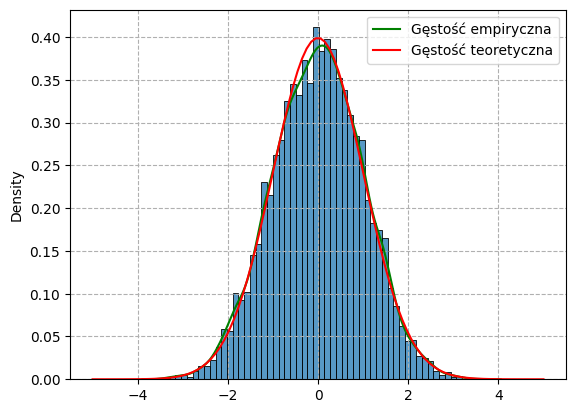

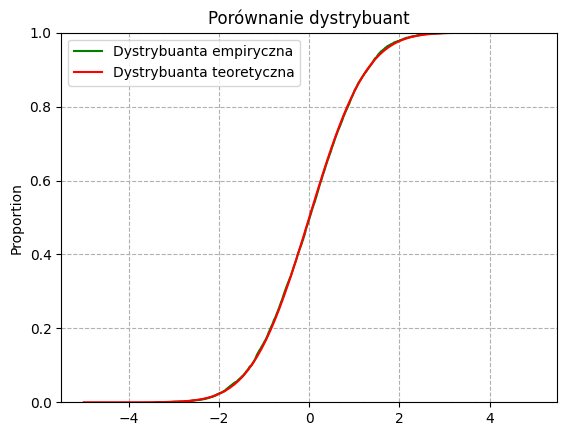

In [59]:
wynik = tuzin()
xs = np.linspace(-5, 5, 100)

# Porównanie gęstośi

sns.histplot(
    wynik,
    stat="density",
)
sns.kdeplot(wynik, color="g", label="Gęstość empiryczna")
plt.plot(xs, norm.pdf(xs, 0, 1), color="r", label="Gęstość teoretyczna")
plt.grid(linestyle="--")
plt.legend(loc="best")
plt.show()

# Porównanie dystrybuant

sns.ecdfplot(wynik, color="g", label="Dystrybuanta empiryczna")
plt.plot(xs, norm.cdf(xs, 0, 1), color="r", label="Dystrybuanta teoretyczna")

plt.title("Porównanie dystrybuant")
plt.grid(linestyle="--")
plt.legend(loc="best")
plt.show()

### Metoda Ziggurat

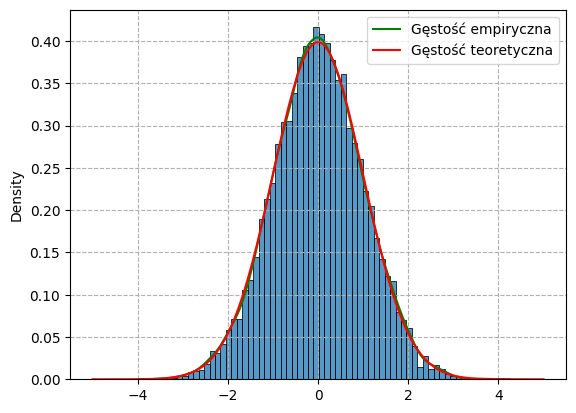

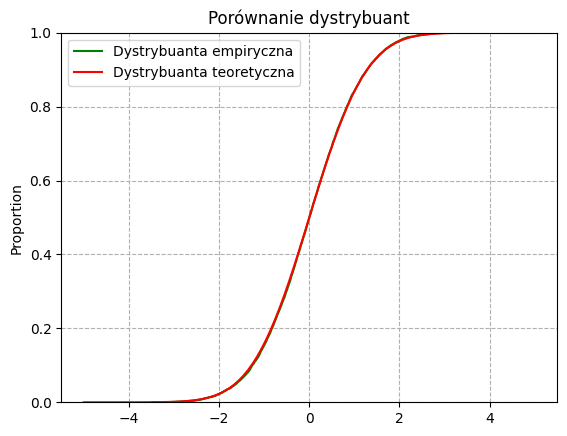

In [60]:
def fi(x: float):
    return np.exp(-(x**2) / 2)


def fi_1(x: float):
    return np.sqrt(-np.log(x**2))


def ziggurat(
    size: int = 10000, n: int = 256, r: float = 3.6541528853610088
) -> typing.List[float]:
    """
    Funckja generująca zmienne z rozkładu normalnego metodą ziggurat

    Parametry:
    size (int): liczba zmiennych losowych do wygenerowania
    n (int): liczba schodków
    r (float): współrzędna początku ogonu w zależności od n

    Zwraca:
    samples (list): zmienne lososwe z rozkładu normalnego N(0,1)

    -> ziggurat(size = 1000, n = 256, r = 3.6541528853610088)
    """
    v = r * fi(r) + np.sqrt(np.pi / 2) * math.erfc(
        r / np.sqrt(2)
    )  # Wyliczanie powierzchni pojedyńczego prostokąta
    X = [r]
    for i in range(n - 1):  # Tworzenie odpowiednich obszarów(schodków)
        X.append(fi_1(v / X[i] + fi(X[i])))

    exp_counter = 0  # zliczanie ile razy użyto rozkładu wykładniczego

    samples = []
    while (
        len(samples) < size
    ):  # Generowanie zmiennych losowych do momentu uzyskania odpowiedniej ilości próbek
        i = np.random.randint(0, n - 1)  # wybieramy warstwe
        u1 = np.random.uniform(-1, 1)  # losujemy znak
        sign = 1 if u1 >= 0 else -1
        x = (
            np.random.uniform() * X[i]
        )  # losowanie punktu wewnątrz wylosowanego prostokąta
        if x < X[i + 1]:
            samples.append(sign * x)
        elif i == 0:  # korzystamy z algorytmu awaryjnego
            while True:
                x = -np.log(np.random.uniform()) / X[1]
                y = -np.log(np.random.uniform())
                exp_counter += 2
                if 2 * y > x**2:
                    samples.append(sign * (x + X[1]))
                    break
        else:
            y = fi(X[i]) + np.random.uniform() * (fi(X[i + 1]) - fi(X[i]))
            if y < fi(x):
                samples.append(sign * x)
    return samples, exp_counter


wynik = ziggurat()[0]
xs = np.linspace(-5, 5, 100)

# Porównanie gęstości

sns.histplot(
    wynik,
    stat="density",
)
sns.kdeplot(wynik, color="g", label="Gęstość empiryczna")
plt.plot(xs, norm.pdf(xs, 0, 1), color="r", label="Gęstość teoretyczna")
plt.grid(linestyle="--")
plt.legend(loc="best")
plt.show()

# Porównanie dystrybuant

sns.ecdfplot(wynik, color="g", label="Dystrybuanta empiryczna")
plt.plot(xs, norm.cdf(xs, 0, 1), color="r", label="Dystrybuanta teoretyczna")

plt.title("Porównanie dystrybuant")
plt.grid(linestyle="--")
plt.legend(loc="best")
plt.show()

## Porównanie metod generowania rozkładu normalnego

W tej sekcji przyjrzymy się porównaniu wszytskich przedstawionych powyżej sposobów generowania rozkładu normalnego. W pierwszej kolejności przeanalizujemy czas wykonania algorytmu.

In [61]:
X = np.arange(0, 10**5, 10**4)

Y1 = np.zeros(len(X))
Y2 = np.zeros(len(X))
Y3 = np.zeros(len(X))
Y4 = np.zeros(len(X))
Y5 = np.zeros(len(X))

j = 0

for N in range(0, 10**5, 10**4):
    suma1 = 0
    suma2 = 0
    suma3 = 0
    suma4 = 0
    suma5 = 0
    for i in range(10):
        t = time.process_time()
        box_muller(size=N)
        suma1 += time.process_time() - t

        t = time.process_time()
        marsagla(size=N)
        suma2 += time.process_time() - t

        t = time.process_time()
        ziggurat(size=N)
        suma3 += time.process_time() - t

        t = time.process_time()
        tuzin(size=N)
        suma4 += time.process_time() - t

        t = time.process_time()
        odwr_dyst(size=N)
        suma5 += time.process_time() - t

    Y1[j] = suma1 / 10
    Y2[j] = suma2 / 10
    Y3[j] = suma3 / 10
    Y4[j] = suma4 / 10
    Y5[j] = suma5 / 10

    j += 1

Porównanie różnych metod generowania rozkładu normalnego N(0,1) pod względem szybkości działania

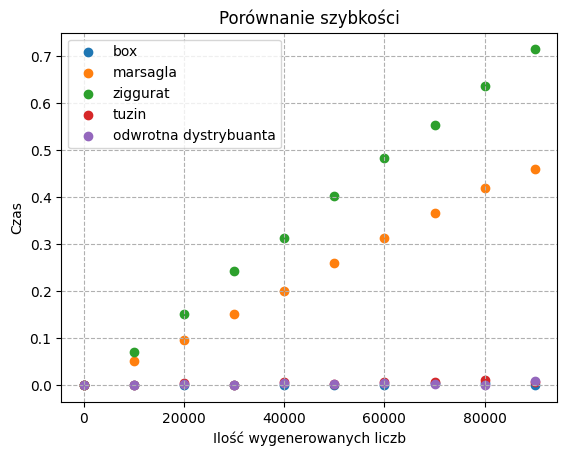

In [62]:
plt.scatter(X, Y1, label="box")
plt.scatter(X, Y2, label="marsagla")
plt.scatter(X, Y3, label="ziggurat")
plt.scatter(X, Y4, label="tuzin")
plt.scatter(X, Y5, label="odwrotna dystrybuanta")

plt.title("Porównanie szybkości")
plt.xlabel("Ilość wygenerowanych liczb")
plt.ylabel("Czas")
plt.legend()
plt.grid(linestyle="--")
plt.show()

Analizując wykresy działania programu w zależności od ilości generowanych próbek zauważyć możemy, że metoda zigguratu oraz marsagli działa najwolniej spowodu użytych w nich pętli.

Porównanie różnych metod generowania rozkładu normalnego N(0,1) pod względem dokładności.


In [63]:
n1 = 1000
n2 = 1000

mi1 = np.zeros(n1)
mi2 = np.zeros(n1)
mi3 = np.zeros(n1)
mi4 = np.zeros(n1)
mi5 = np.zeros(n1)
mi6 = np.zeros(n1)

var1 = np.zeros(n1)
var2 = np.zeros(n1)
var3 = np.zeros(n1)
var4 = np.zeros(n1)
var5 = np.zeros(n1)
var6 = np.zeros(n1)

for i in range(n1):
    mi1[i] = np.mean(box_muller(size=n2))
    mi2[i] = np.mean(marsagla(size=n2))
    mi3[i] = np.mean(tuzin(size=n2))
    mi4[i] = np.mean(ziggurat(size=n2)[0])
    mi5[i] = np.mean(odwr_dyst(size=n2))
    mi6[i] = np.mean(np.random.normal(0, 1, n2))

    var1[i] = np.var(box_muller(size=n2))
    var2[i] = np.var(marsagla(size=n2))
    var3[i] = np.var(tuzin(size=n2))
    var4[i] = np.var(ziggurat(size=n2)[0])
    var5[i] = np.var(odwr_dyst(size=n2))
    var6[i] = np.var(np.random.normal(0, 1, n2))

MI = [mi1, mi2, mi3, mi4, mi5, mi6]
VAR = [var1, var2, var3, var4, var5, var6]

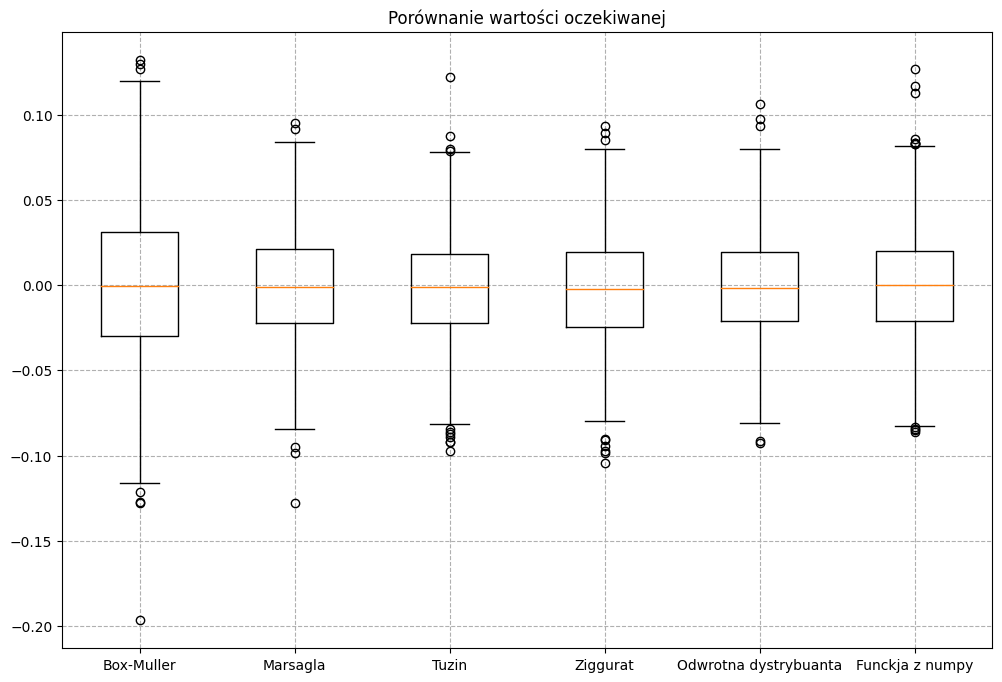

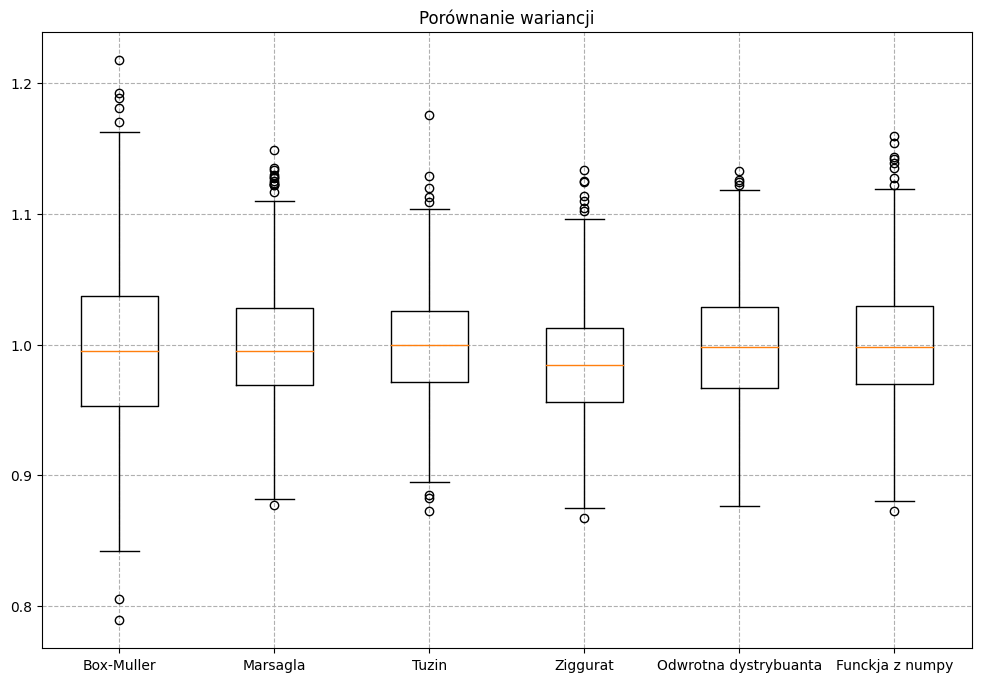

In [64]:
plt.figure(figsize=(12, 8))
plt.boxplot(MI)
plt.grid(linestyle="--")
plt.title("Porównanie wartości oczekiwanej")
plt.xticks(
    [1, 2, 3, 4, 5, 6],
    [
        "Box-Muller",
        "Marsagla",
        "Tuzin",
        "Ziggurat",
        "Odwrotna dystrybuanta",
        "Funckja z numpy",
    ],
)
plt.show()

plt.figure(figsize=(12, 8))
plt.boxplot(VAR)
plt.grid(linestyle="--")
plt.title("Porównanie wariancji")
plt.xticks(
    [1, 2, 3, 4, 5, 6],
    [
        "Box-Muller",
        "Marsagla",
        "Tuzin",
        "Ziggurat",
        "Odwrotna dystrybuanta",
        "Funckja z numpy",
    ],
)
plt.show()

Pod względem dokładności najlepiej wypadła metoda tuzinów oraz metoda odwrotnej dystrybuanty 